In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [8]:
NUM_OF_PREV_ITEMS = 5
np.random.seed(1)

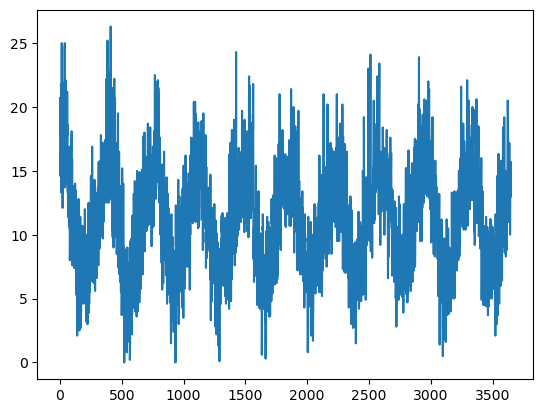

'data_series = data_frame.squeeze()\ndf = pd.to_numeric(data_series)\ndf'

In [45]:
data_frame = read_csv('daily-minimum-temperatures-in-me.csv', usecols=[1])
plt.plot(data_frame)
plt.show()

In [46]:
data = data_frame.values
data = data.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [47]:
train, test = data[0:int(len(data) * 0.7), :], data[int(len(data) * 0.7):len(data), :]

In [49]:
def reconstruct_data(dataset, n=1):
    x, y = [], []

    for i in range(len(dataset) - n - 1):
        a = dataset[i:(i+n), 0]
        x.append(a)
        y.append(dataset[i+n, 0])

    return np.array(x), np.array(y)

In [50]:
train_x, train_y = reconstruct_data(train, NUM_OF_PREV_ITEMS)
test_x, test_y = reconstruct_data(test, NUM_OF_PREV_ITEMS)

In [51]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [53]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, NUM_OF_PREV_ITEMS)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

2023-08-02 23:39:45.351960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-02 23:39:45.352352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-02 23:39:45.352812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [54]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=10, batch_size=16, verbose=2)

Epoch 1/10


2023-08-02 23:41:39.866397: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-02 23:41:39.974260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-02 23:41:39.974690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-02 23:41:39.975166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

160/160 - 2s - loss: 0.0384 - 2s/epoch - 12ms/step
Epoch 2/10
160/160 - 0s - loss: 0.0149 - 241ms/epoch - 2ms/step
Epoch 3/10
160/160 - 0s - loss: 0.0141 - 236ms/epoch - 1ms/step
Epoch 4/10
160/160 - 0s - loss: 0.0129 - 236ms/epoch - 1ms/step
Epoch 5/10
160/160 - 0s - loss: 0.0128 - 238ms/epoch - 1ms/step
Epoch 6/10
160/160 - 0s - loss: 0.0115 - 236ms/epoch - 1ms/step
Epoch 7/10
160/160 - 0s - loss: 0.0114 - 237ms/epoch - 1ms/step
Epoch 8/10
160/160 - 0s - loss: 0.0113 - 234ms/epoch - 1ms/step
Epoch 9/10
160/160 - 0s - loss: 0.0110 - 243ms/epoch - 2ms/step
Epoch 10/10
160/160 - 0s - loss: 0.0111 - 238ms/epoch - 1ms/step


In [55]:
test_predict = model.predict(test_x)
test_predict = scaler.inverse_transform(test_predict)
test_labels = scaler.inverse_transform([test_y])

2023-08-02 23:42:28.245715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-02 23:42:28.246329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-02 23:42:28.246926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

35/35 [==============================] - 0s 733us/step


In [56]:
test_score = mean_squared_error(test_labels[0], test_predict[:, 0])
print('Score on test set: %.2f MSE' % test_score)

Score on test set: 5.64 MSE


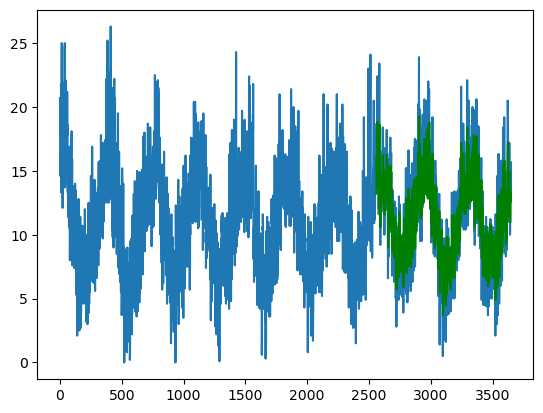

In [57]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_x) + 2 * NUM_OF_PREV_ITEMS+1: len(data)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data))
plt.plot(test_predict_plot, color='green')
plt.show()